In [2]:
pip install pandas numpy faker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 42.4 MB/s eta 0:00:00


In [9]:
import pandas as pd
import numpy as np
from faker import Faker

# Initialize Faker
fake = Faker()



# Number of rows
num_rows = 1000

# Generate data
data = {
         "transfer_id": list(range(1, num_rows + 1)),                      # Simple sequential IDs
    "user_id": np.random.randint(1000, 2000, size=num_rows)
    ,
    "login_time": [fake.date_time_this_year() for _ in range(num_rows)],
    "transaction_amount": np.round(np.random.exponential(scale=100, size=num_rows), 2),
    "transaction_type": np.random.choice(['wallet', 'netbanking', 'upi', 'card'], size=num_rows),
    "location": [fake.city() for _ in range(num_rows)],
    "device_type": np.random.choice(['mobile', 'desktop', 'tablet'], size=num_rows),
    "transaction_status": np.random.choice(['success', 'failure'], size=num_rows, p=[0.9, 0.1]),
    "fraudulent": np.random.choice([0, 1], size=num_rows, p=[0.95, 0.05])
}

# Create DataFrame
df = pd.DataFrame(data)

# Preview the data
file_name = pd.DataFrame(df)
df.to_csv("paytm_fraud_data.csv", index=False)
print("data set")
print(df.head())


data set
   transfer_id  user_id                 login_time  transaction_amount  \
0            1     1441 2025-07-08 11:26:29.903396               93.32   
1            2     1729 2025-01-18 17:45:27.255265               47.24   
2            3     1803 2025-04-04 02:43:41.282328               46.87   
3            4     1818 2025-05-24 09:43:23.136003               10.98   
4            5     1576 2025-03-05 14:04:52.797961               26.72   

  transaction_type           location device_type transaction_status  \
0              upi         Carterberg      mobile            success   
1       netbanking       Barbaramouth      mobile            success   
2              upi  North Jeremyshire     desktop            success   
3              upi          Coreyview      tablet            success   
4       netbanking          Tinaburgh      mobile            success   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0  


In [11]:
from google.colab import files
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve,auc, confusion_matrix

#

In [10]:
file_name = "paytm_fraud_data.csv"
df = pd.read_csv(file_name)
print("data set")
print(df.head())
df.info()


data set
   transfer_id  user_id                  login_time  transaction_amount  \
0            1     1441  2025-07-08 11:26:29.903396               93.32   
1            2     1729  2025-01-18 17:45:27.255265               47.24   
2            3     1803  2025-04-04 02:43:41.282328               46.87   
3            4     1818  2025-05-24 09:43:23.136003               10.98   
4            5     1576  2025-03-05 14:04:52.797961               26.72   

  transaction_type           location device_type transaction_status  \
0              upi         Carterberg      mobile            success   
1       netbanking       Barbaramouth      mobile            success   
2              upi  North Jeremyshire     desktop            success   
3              upi          Coreyview      tablet            success   
4       netbanking          Tinaburgh      mobile            success   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0  
<class 'pan

In [12]:
print("\nMissing Values :")
print(df.isnull().sum())
df = pd.get_dummies(df, columns=['transaction_type', 'location', 'device_type'])
print(df.head())
df['transaction_status'] = df['transaction_status'].map({'success': 1, 'failure': 0})

#


Missing Values :
transfer_id           0
user_id               0
login_time            0
transaction_amount    0
transaction_type      0
location              0
device_type           0
transaction_status    0
fraudulent            0
dtype: int64
   transfer_id  user_id                  login_time  transaction_amount  \
0            1     1441  2025-07-08 11:26:29.903396               93.32   
1            2     1729  2025-01-18 17:45:27.255265               47.24   
2            3     1803  2025-04-04 02:43:41.282328               46.87   
3            4     1818  2025-05-24 09:43:23.136003               10.98   
4            5     1576  2025-03-05 14:04:52.797961               26.72   

  transaction_status  fraudulent  transaction_type_card  \
0            success           0                  False   
1            success           0                  False   
2            success           0                  False   
3            success           0                  False   
4      

/tmp/ipython-input-716546200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fraudulent', data=df,palette="coolwarm")


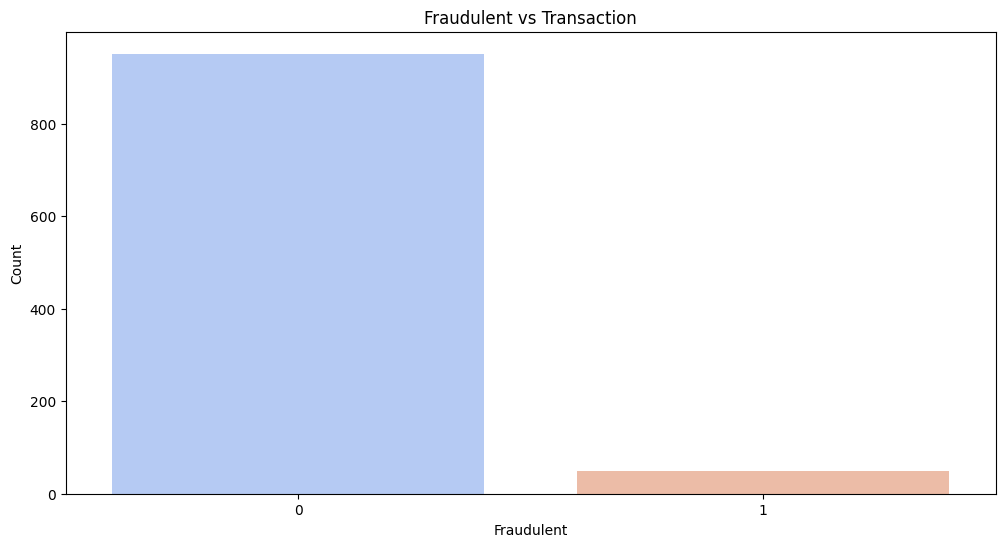

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x='fraudulent', data=df,palette="coolwarm")
plt.title("Fraudulent vs Transaction")
plt.xlabel("Fraudulent")
plt.ylabel("Count")
plt.show()

#

majority transactions are legit
class imbalace

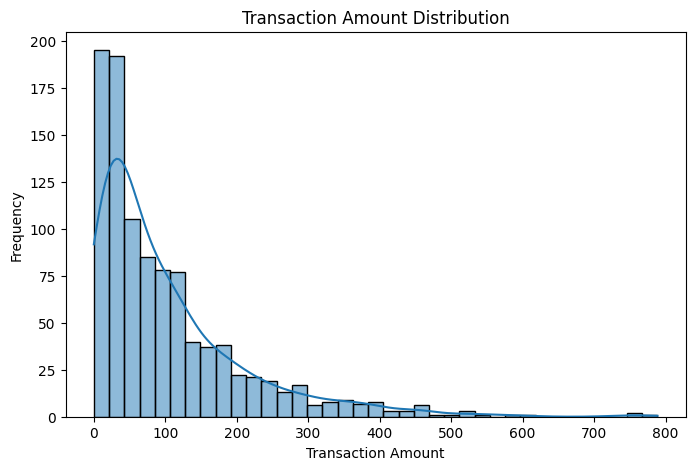

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['transaction_amount'], kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

#

In [16]:
x = df.drop(columns=["transfer_id","user_id","login_time","fraudulent"])
y = df["fraudulent"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (800, 972)
x_test shape: (200, 972)
y_train shape: (800,)
y_test shape: (200,)


In [19]:
model = LogisticRegression(max_iter=1000,random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("classification report")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#

classification report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       190
           1       0.00      0.00      0.00        10

    accuracy                           0.95       200
   macro avg       0.47      0.50      0.49       200
weighted avg       0.90      0.95      0.93       200

[[190   0]
 [ 10   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


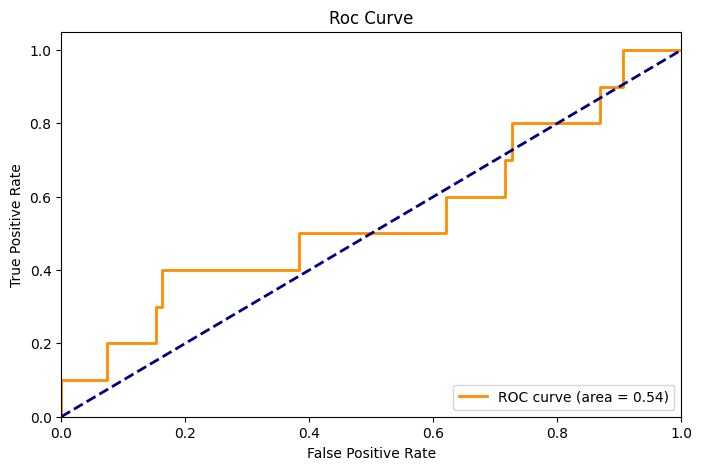

In [25]:
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Roc Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
#

In [26]:
import joblib
model_fileNmae = "paytm_fraud_detection_model.joblib"
joblib.dump(model, model_fileNmae)
print(f"Model saved as {model_fileNmae}")
#

Model saved as paytm_fraud_detection_model.joblib
